<a href="https://colab.research.google.com/github/lathu-24/Machine-Learning/blob/main/2506728_20241682_lathusan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [44]:
# Display settings
pd.set_option('display.max_columns', None)

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Show first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
# Shape of the dataset
df.shape


(7043, 21)

In [46]:
# Replace blanks with NaN
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)

# Convert to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop rows where TotalCharges is missing
df.dropna(subset=["TotalCharges"], inplace=True)

df.reset_index(drop=True, inplace=True)

In [47]:

df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [48]:
df.info()

# Quick statistical summary (numerical features only)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [49]:
# Check missing values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [50]:
# Convert the target variable from categorical to numeric
df['Churn'] = df['Churn'].map({"No": 0, "Yes": 1})

# Display the distribution of the target classes
print(df["Churn"].value_counts())

Churn
0    5163
1    1869
Name: count, dtype: int64


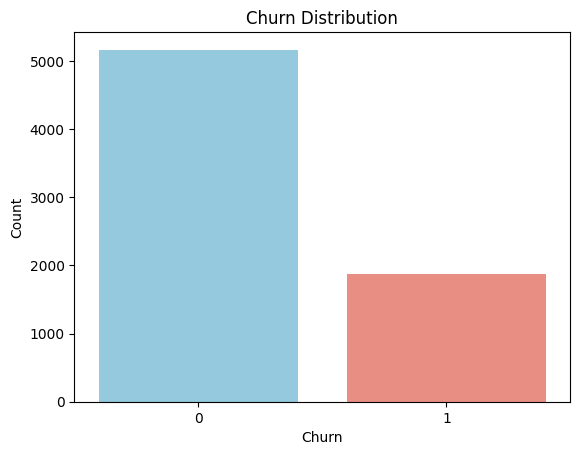

In [51]:
sns.countplot(
    x=df["Churn"],
    hue=df["Churn"],
    palette=["skyblue", "salmon"],
    legend=False
)

plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

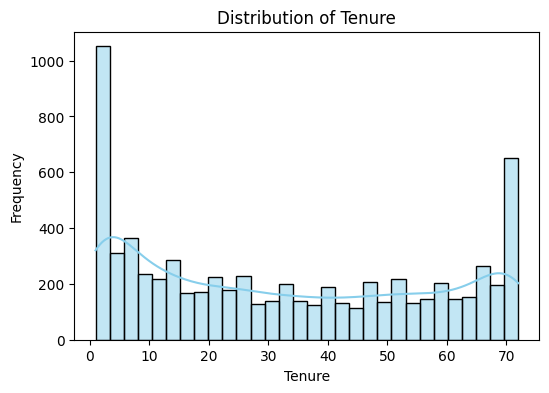

In [52]:
#distribution of tenure
plt.figure(figsize=(6,4))
sns.histplot(df["tenure"], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Tenure")
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.show()

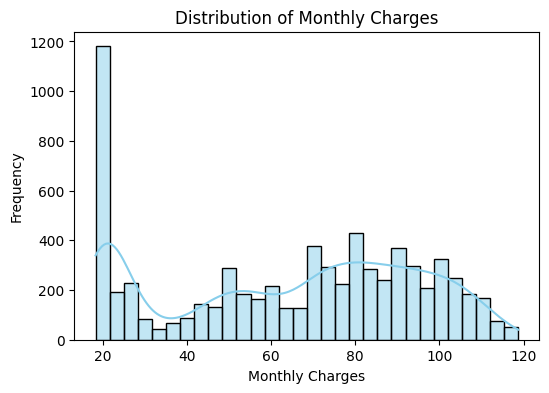

In [53]:
#distribution of monthly charges
plt.figure(figsize=(6,4))
sns.histplot(df["MonthlyCharges"], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

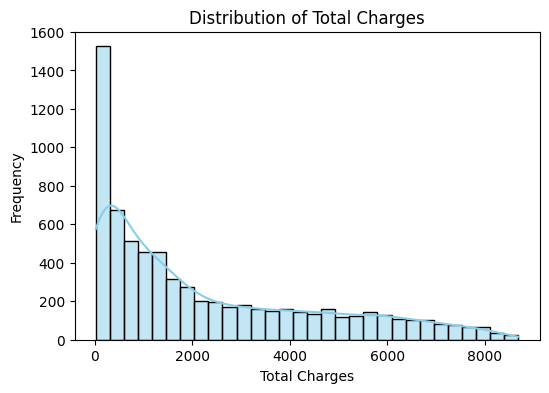

In [54]:
#distribution of total charges
plt.figure(figsize=(6,4))
sns.histplot(df["TotalCharges"], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Total Charges")
plt.xlabel("Total Charges")
plt.ylabel("Frequency")
plt.show()

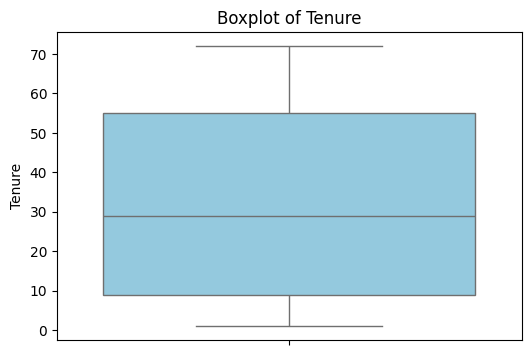

In [55]:
#boxplots of numerical features
plt.figure(figsize=(6,4))
sns.boxplot(y=df["tenure"], color="skyblue")
plt.title("Boxplot of Tenure")
plt.ylabel("Tenure")
plt.show()

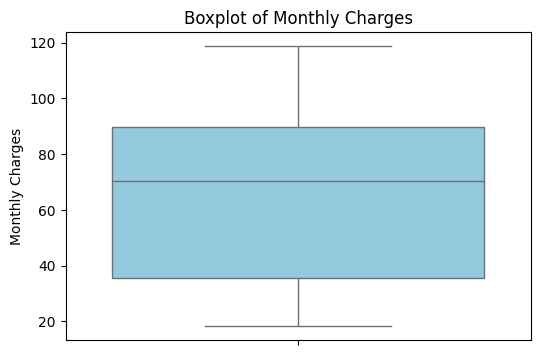

In [56]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df["MonthlyCharges"], color="skyblue")
plt.title("Boxplot of Monthly Charges")
plt.ylabel("Monthly Charges")
plt.show()

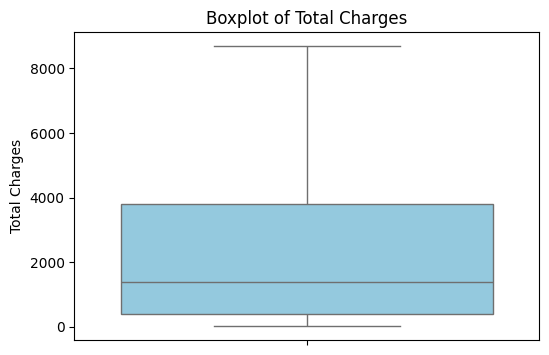

In [57]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df["TotalCharges"], color="skyblue")
plt.title("Boxplot of Total Charges")
plt.ylabel("Total Charges")
plt.show()

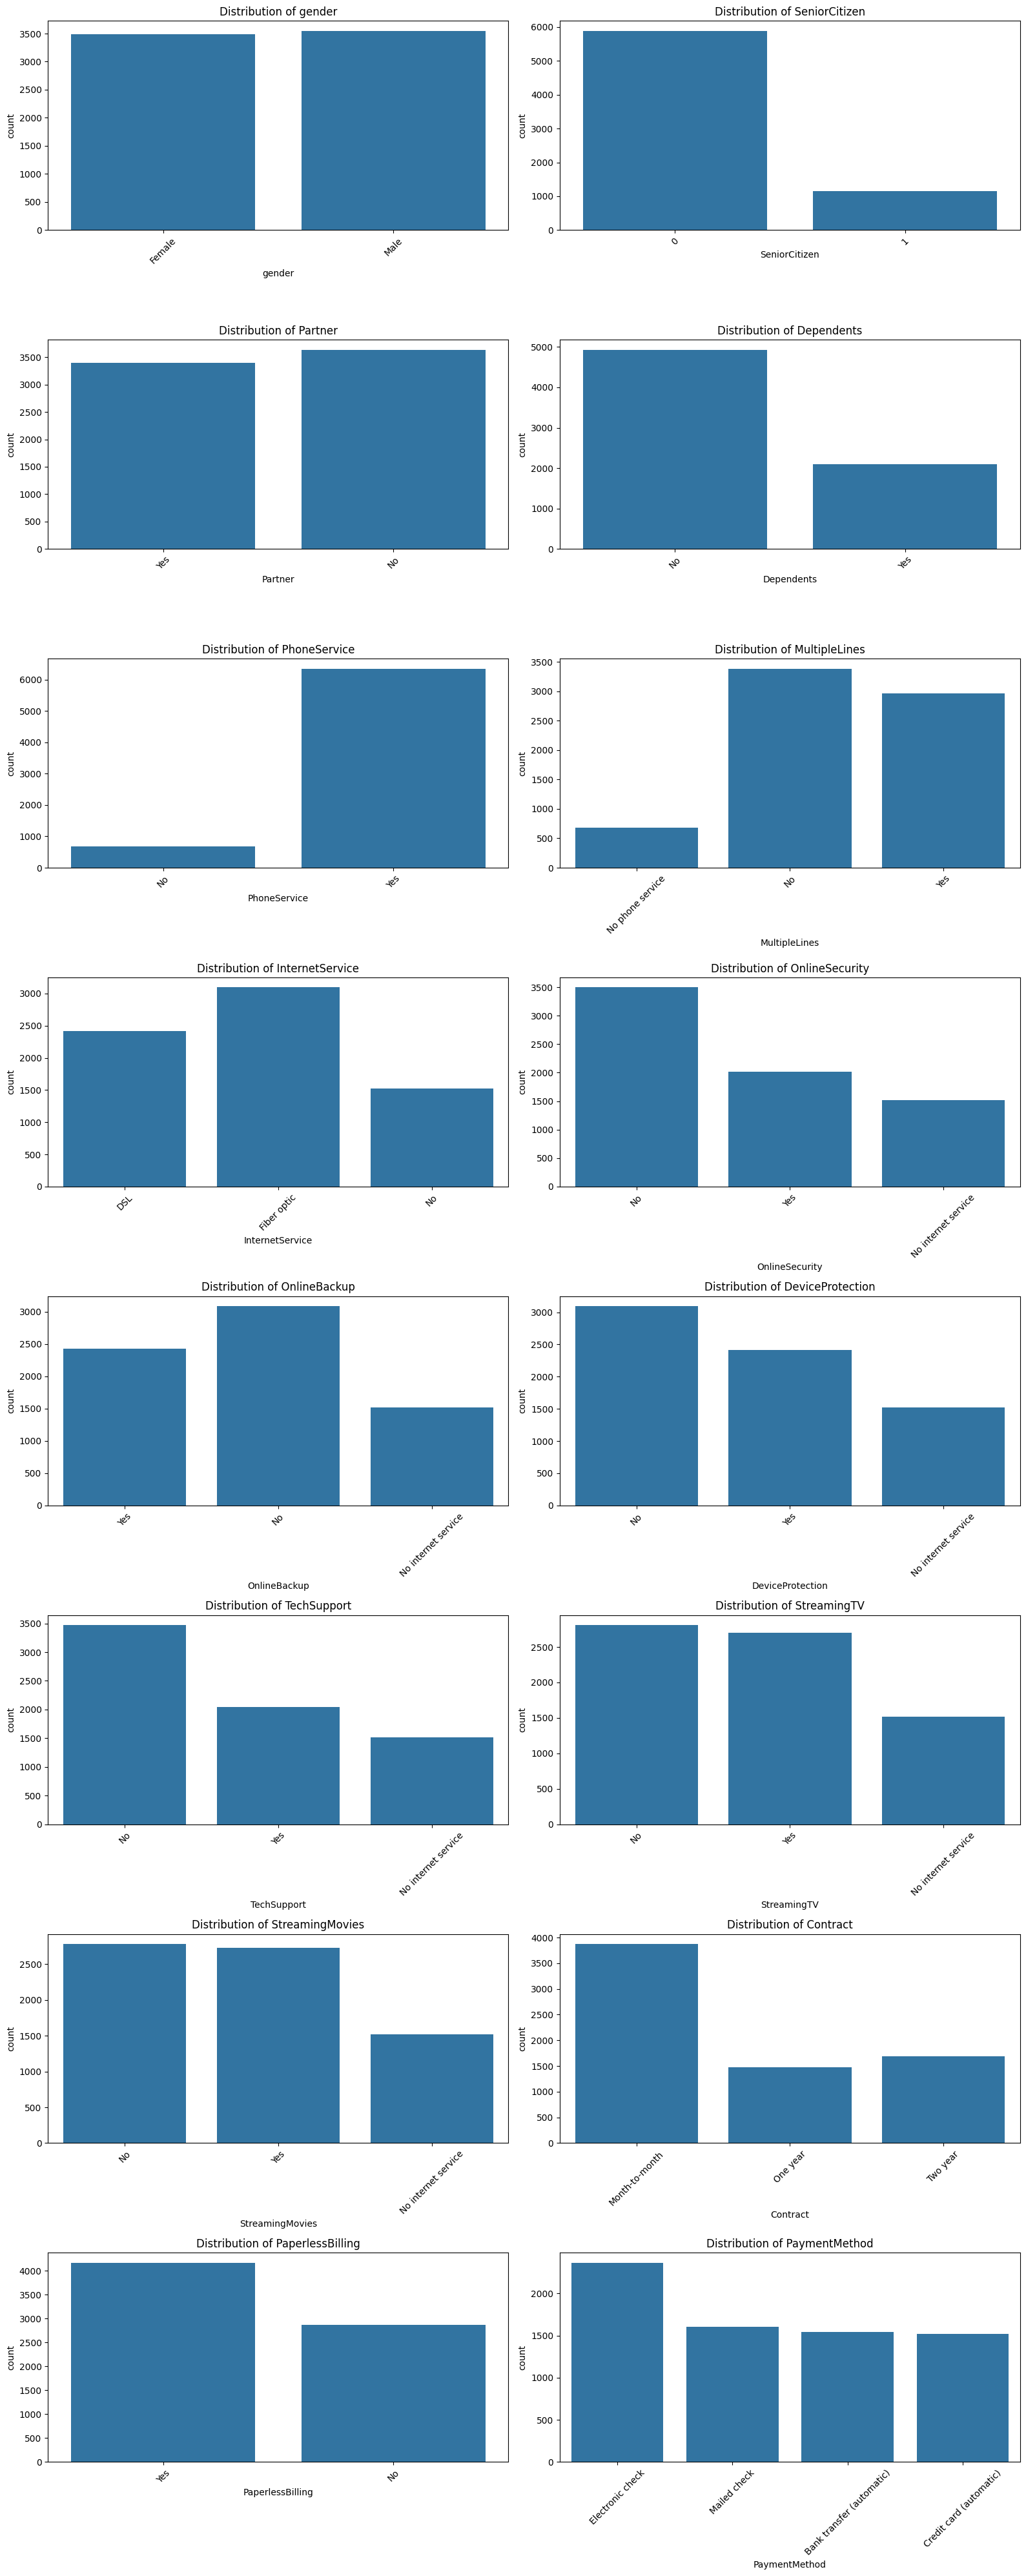

In [58]:
# List of categorical columns to visualize
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Create a large figure to display multiple subplots clearly
plt.figure(figsize=(16, 40))

# Loop through each categorical column and plot its distribution
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(8, 2, i)  # Arrange plots in an 8x2 grid
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)  # Rotate labels for readability

# Adjust spacing to prevent overlapping
plt.tight_layout()

# Display all plots
plt.show()

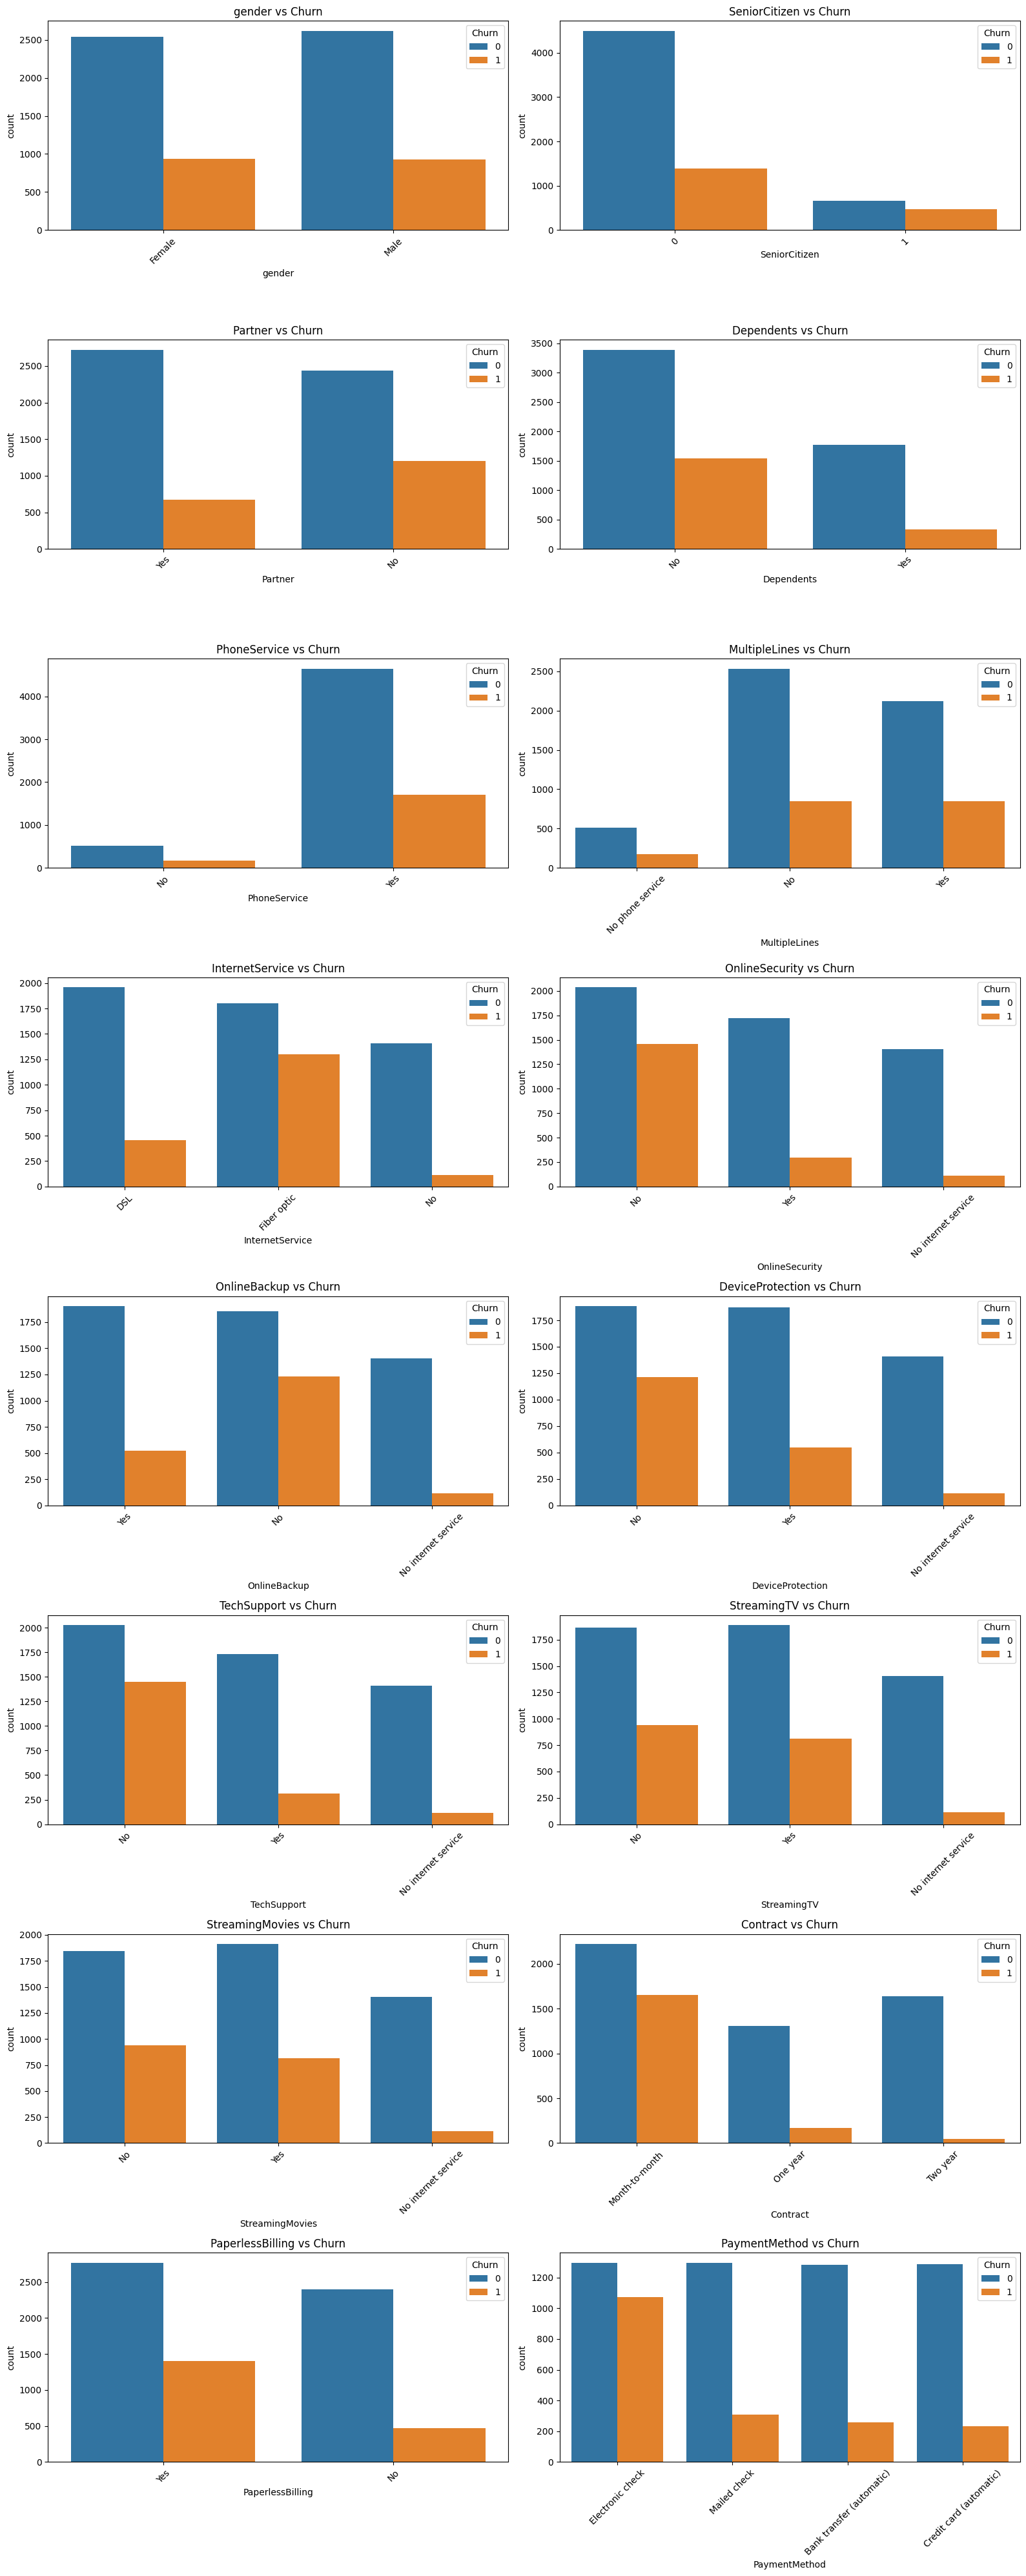

In [59]:
# Visualizing the relationship between each categorical feature and churn

plt.figure(figsize=(16, 40))

# Loop through each categorical column and plot its distribution split by churn status
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(8, 2, i)
    sns.countplot(data=df, x=col, hue="Churn")
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)

# Adjust layout to avoid overlapping elements
plt.tight_layout()

plt.show()

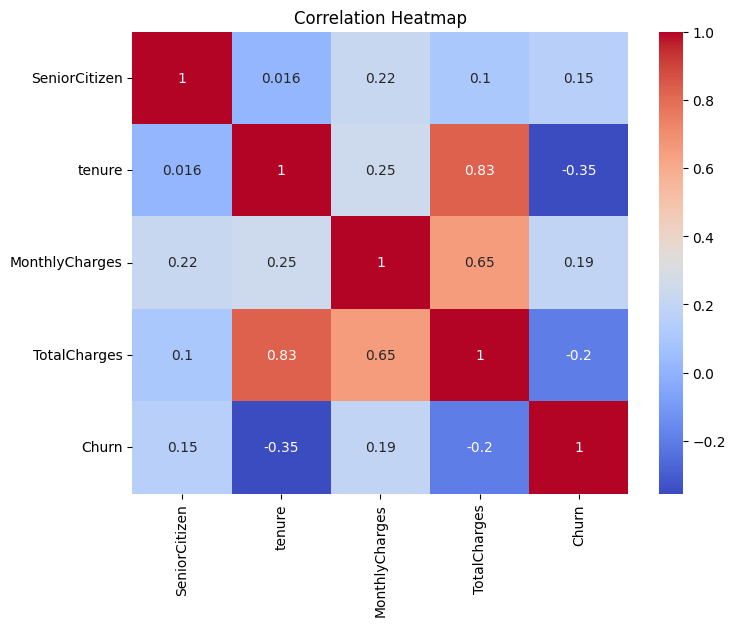

In [60]:
# correlation analysis
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [61]:
#detect the outliers
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
def find_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)   # 25th percentile
    Q3 = df[column].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1                    # Interquartile Range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Get rows where outliers exist
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"Outliers in '{column}': {len(outliers)}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    return outliers

In [62]:
for col in numeric_cols:
    print("\n" + "="*50)
    find_outliers_iqr(col)


Outliers in 'tenure': 0
Lower bound: -60.0, Upper bound: 124.0

Outliers in 'MonthlyCharges': 0
Lower bound: -45.824999999999996, Upper bound: 171.27499999999998

Outliers in 'TotalCharges': 0
Lower bound: -4688.481250000001, Upper bound: 8884.66875


In [63]:
# Separate the dataset into features (X) and target variable (y)
# X contains all input features except the target column 'Churn'
df = df.drop("customerID", axis=1)
X = df.drop("Churn", axis=1)

# y contains only the target variable 'Churn' (0 = No churn, 1 = Yes churn)
y = df["Churn"]

In [64]:
# Convert all categorical variables in X into numerical format using One-Hot Encoding.
# get_dummies() creates binary columns for each category.

X = pd.get_dummies(X, drop_first=True)

X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [65]:
# Standardize the feature set to ensure all numerical values are on a similar scale.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the entire feature set (X) and transform it.
# converts all features to a standard normal distribution (mean=0, std=1).
X_scaled = scaler.fit_transform(X)

In [66]:

#data validation
import pandas as pd

print("1. Missing Values Check")
print(df.isnull().sum())
print("\nNo missing values remain.\n")

print("2. duplicate Values Check")
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())
print("no duplicates")

print("3. Data Types Check")
print(df.dtypes)
print("\nAll data types are correct.\n")

print("4. Numeric Feature Range Check")
print("Tenure range:", df["tenure"].min(), "to", df["tenure"].max())
print("MonthlyCharges range:", df["MonthlyCharges"].min(), "to", df["MonthlyCharges"].max())
print("TotalCharges range:", df["TotalCharges"].min(), "to", df["TotalCharges"].max())
print("\nNumeric ranges are valid.\n")





1. Missing Values Check
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No missing values remain.

2. duplicate Values Check
0
no duplicates
3. Data Types Check
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBill

In [67]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
#apply smote
sm = SMOTE(random_state=42)

#produce the balanced full dataset
X_bal, y_bal = sm.fit_resample(X, y)

print("Original class distribution:")
print(y.value_counts())

print("\nBalanced distribution after SMOTE:")
print(y_bal.value_counts())

#split the data
X_train_bal, X_test, y_train_bal, y_test = train_test_split(
    X_bal, y_bal,
    test_size=0.2,
    random_state=42,
    stratify=y_bal
)

print("\nTraining set distribution:")
print(y_train_bal.value_counts())

print("\nTest set distribution:")
print(y_test.value_counts())

Original class distribution:
Churn
0    5163
1    1869
Name: count, dtype: int64

Balanced distribution after SMOTE:
Churn
0    5163
1    5163
Name: count, dtype: int64

Training set distribution:
Churn
0    4130
1    4130
Name: count, dtype: int64

Test set distribution:
Churn
0    1033
1    1033
Name: count, dtype: int64


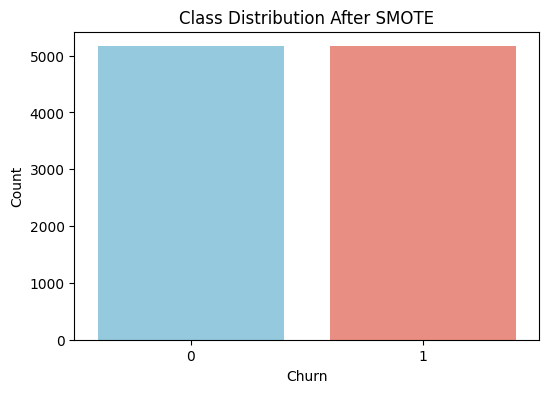

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))

sns.countplot(
    x=y_bal,
    hue=y_bal,
    palette=["skyblue", "salmon"],
    legend=False
)

plt.title("Class Distribution After SMOTE")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

In [69]:
print("• X_train shape:", X_train_bal.shape)
print("• X_test shape:", X_test.shape)
print("• y_train shape:", y_train_bal.shape)
print("• y_test shape:", y_test.shape)

• X_train shape: (8260, 30)
• X_test shape: (2066, 30)
• y_train shape: (8260,)
• y_test shape: (2066,)


Neural Network Accuracy: 0.7967086156824782
              precision    recall  f1-score   support

           0       0.84      0.73      0.78      1033
           1       0.76      0.87      0.81      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



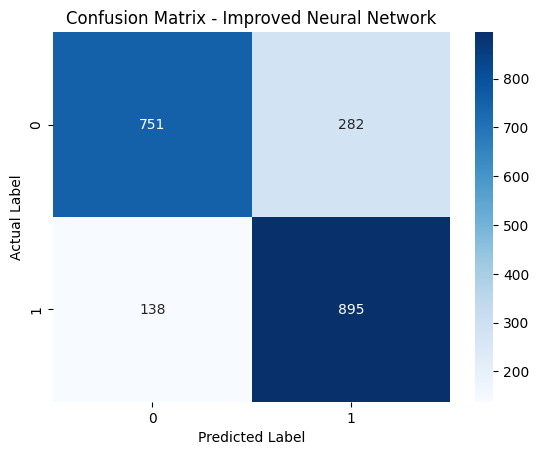

In [70]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Neural Network Model
nn = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    alpha=0.0005,
    max_iter=400,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=42
)

# Train the improved Neural Network
nn.fit(X_train_bal, y_train_bal)

# Predictions
y_pred_nn = nn.predict(X_test)

# Performance
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Improved Neural Network")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [71]:
#overfitting check(nn)
train_pred_nn = nn.predict(X_train_bal)
test_pred_nn = nn.predict(X_test)

print("NN Training Accuracy:", accuracy_score(y_train_bal, train_pred_nn))
print("NN Test Accuracy:", accuracy_score(y_test, test_pred_nn))

NN Training Accuracy: 0.7937046004842615
NN Test Accuracy: 0.7967086156824782


In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

#tuning grid for churn prediction
nn_param_grid = {
    'hidden_layer_sizes': [
        (120,),
        (150,),
        (200,)
    ],
    'alpha': [0.0001, 0.0005]
}

# Base model setup
nn_model = MLPClassifier(
    activation='relu',
    solver='adam',
    max_iter=400,
    early_stopping=True,
    random_state=42
)

# Grid search (fast)
nn_grid = GridSearchCV(
    estimator=nn_model,
    param_grid=nn_param_grid,
    cv=2,
    scoring='accuracy',  # maximize accuracy
    n_jobs=-1
)


nn_grid.fit(X_train_bal, y_train_bal)

print("Best NN Parameters:", nn_grid.best_params_)

# Best model
best_nn = nn_grid.best_estimator_

# Predictions on test data
y_pred_best_nn = best_nn.predict(X_test)

print("\nTUNED Neural Network Accuracy:", accuracy_score(y_test, y_pred_best_nn))
print(classification_report(y_test, y_pred_best_nn))

Best NN Parameters: {'alpha': 0.0005, 'hidden_layer_sizes': (200,)}

TUNED Neural Network Accuracy: 0.808809293320426
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1033
           1       0.79      0.84      0.81      1033

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



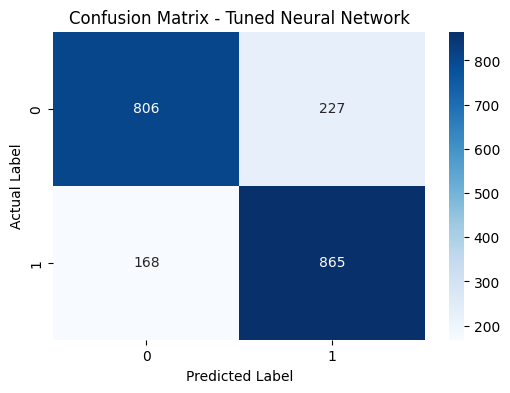

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for tuned NN
cm_nn_tuned = confusion_matrix(y_test, y_pred_best_nn)

plt.figure(figsize=(6,4))
sns.heatmap(cm_nn_tuned, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Tuned Neural Network")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [74]:
# Overfitting check for Tuned Neural Network Model

# Predictions on training set
train_pred_best_nn = best_nn.predict(X_train_bal)

# Predictions on test set
test_pred_best_nn = best_nn.predict(X_test)

print("Tuned NN Training Accuracy:", accuracy_score(y_train_bal, train_pred_best_nn))
print("Tuned NN Test Accuracy:", accuracy_score(y_test, test_pred_best_nn))

Tuned NN Training Accuracy: 0.8154963680387409
Tuned NN Test Accuracy: 0.808809293320426


Decision Tree Accuracy: 0.7957405614714425
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1033
           1       0.79      0.81      0.80      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



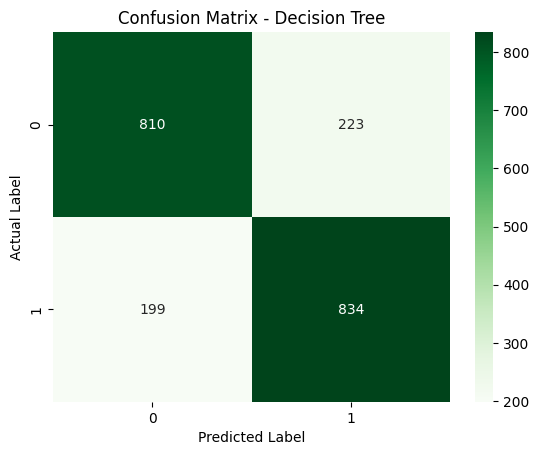

In [75]:
from sklearn.tree import DecisionTreeClassifier
#decision tree
# max_depth=None allows the tree to grow fully, capturing complex patterns.
# random_state=42 ensures reproducibility of results.

dt = DecisionTreeClassifier(max_depth=None, random_state=42)

# Train the Decision Tree model using the SMOTE-balanced training data.
dt.fit(X_train_bal, y_train_bal)

# Make predictions on the test dataset
y_pred_dt = dt.predict(X_test)

# Evaluate model performance using accuracy and classification metrics
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Generate and visualize the confusion matrix
cm2 = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm2, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

# Display the heatmap
plt.show()

In [76]:
# Train default DT again
dt = DecisionTreeClassifier(max_depth=None, random_state=42)
dt.fit(X_train_bal, y_train_bal)

# Predictions for overfitting check
train_pred = dt.predict(X_train_bal)
test_pred = dt.predict(X_test)

print("DT Training Accuracy:", accuracy_score(y_train_bal, train_pred))
print("DT Test Accuracy:", accuracy_score(y_test, test_pred))

DT Training Accuracy: 0.9990314769975787
DT Test Accuracy: 0.7957405614714425


In [77]:
#tuning
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Base DT model
dt_model = DecisionTreeClassifier(random_state=42)

# Fast GridSearch
dt_grid = GridSearchCV(
    estimator=dt_model,
    param_grid=dt_param_grid,
    cv=2,                 # lower cv = faster
    scoring='accuracy',
    n_jobs=-1
)


# Fit using SMOTE-balanced training data
dt_grid.fit(X_train_bal, y_train_bal)

# Show best parameters
print("Best Decision Tree Parameters:", dt_grid.best_params_)

# Best model
best_dt = dt_grid.best_estimator_

# Predictions
y_pred_dt_tuned = best_dt.predict(X_test)

# Results
print("\nTuned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt_tuned))
print(classification_report(y_test, y_pred_dt_tuned))

Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

Tuned Decision Tree Accuracy: 0.8102613746369797
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1033
           1       0.79      0.85      0.82      1033

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



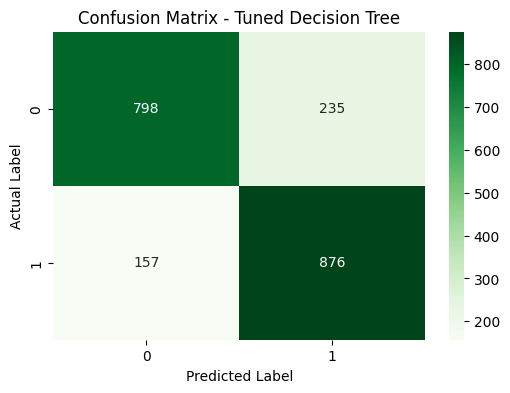

In [78]:
# Confusion Matrix for Tuned Decision Tree

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm_tuned_dt = confusion_matrix(y_test, y_pred_dt_tuned)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_tuned_dt, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Tuned Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [79]:
# Overfitting check for TUNED Decision Tree

# Predictions on training data
train_pred_tuned = best_dt.predict(X_train_bal)

# Predictions on test data
test_pred_tuned = best_dt.predict(X_test)

print("Tuned DT Training Accuracy:", accuracy_score(y_train_bal, train_pred_tuned))
print("Tuned DT Test Accuracy:", accuracy_score(y_test, test_pred_tuned))

Tuned DT Training Accuracy: 0.8697336561743342
Tuned DT Test Accuracy: 0.8102613746369797


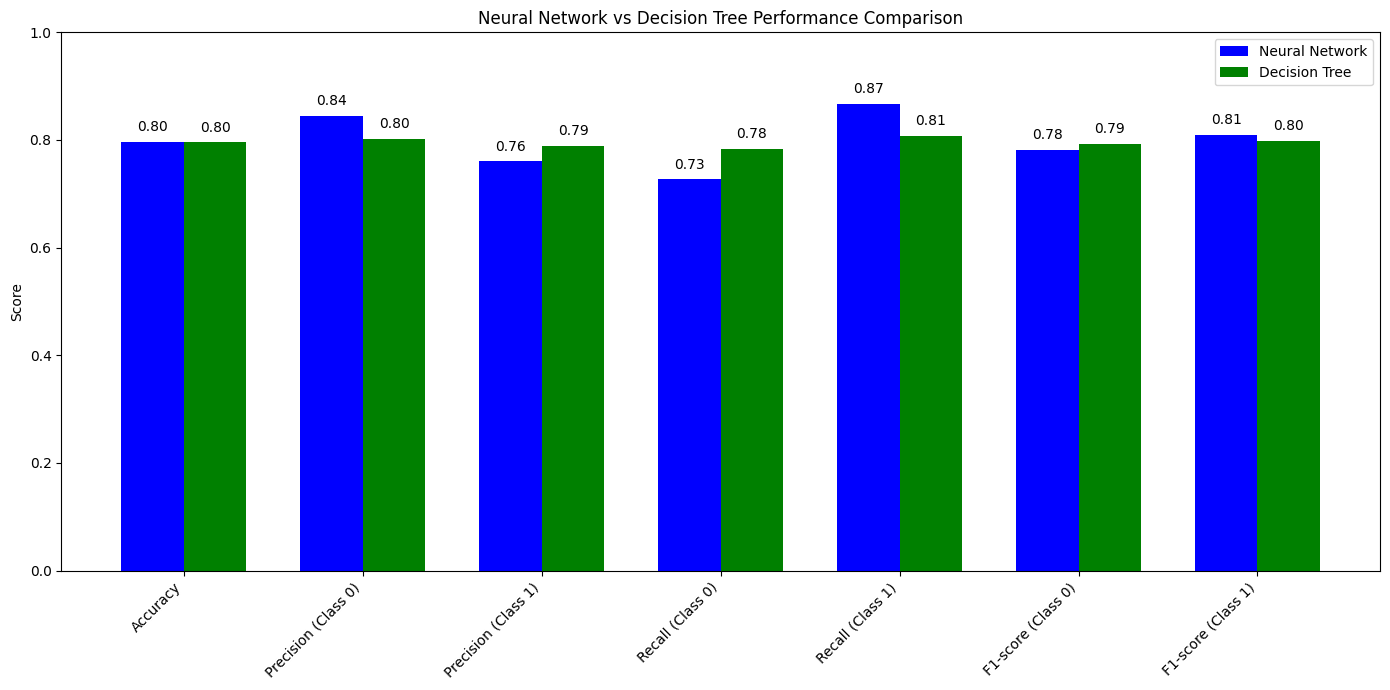

In [80]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
#calculate all metrics for nn
nn_acc = accuracy_score(y_test, y_pred_nn)
nn_prec_0 = precision_score(y_test, y_pred_nn, pos_label=0)
nn_prec_1 = precision_score(y_test, y_pred_nn, pos_label=1)

nn_rec_0 = recall_score(y_test, y_pred_nn, pos_label=0)
nn_rec_1 = recall_score(y_test, y_pred_nn, pos_label=1)

nn_f1_0 = f1_score(y_test, y_pred_nn, pos_label=0)
nn_f1_1 = f1_score(y_test, y_pred_nn, pos_label=1)

#calculate all metrics for dt
dt_acc = accuracy_score(y_test, y_pred_dt)
dt_prec_0 = precision_score(y_test, y_pred_dt, pos_label=0)
dt_prec_1 = precision_score(y_test, y_pred_dt, pos_label=1)

dt_rec_0 = recall_score(y_test, y_pred_dt, pos_label=0)
dt_rec_1 = recall_score(y_test, y_pred_dt, pos_label=1)

dt_f1_0 = f1_score(y_test, y_pred_dt, pos_label=0)
dt_f1_1 = f1_score(y_test, y_pred_dt, pos_label=1)

#organize metrics for plotting
categories = [
    "Accuracy",
    "Precision (Class 0)", "Precision (Class 1)",
    "Recall (Class 0)", "Recall (Class 1)",
    "F1-score (Class 0)", "F1-score (Class 1)"
]

nn_scores = [nn_acc, nn_prec_0, nn_prec_1, nn_rec_0, nn_rec_1, nn_f1_0, nn_f1_1]
dt_scores = [dt_acc, dt_prec_0, dt_prec_1, dt_rec_0, dt_rec_1, dt_f1_0, dt_f1_1]

x = np.arange(len(categories))
width = 0.35

plt.figure(figsize=(14, 7))

# Bars
plt.bar(x - width/2, nn_scores, width, label='Neural Network', color='blue')
plt.bar(x + width/2, dt_scores, width, label='Decision Tree', color='green')

# Labels
plt.xticks(x, categories, rotation=45, ha='right')
plt.ylabel("Score")
plt.title("Neural Network vs Decision Tree Performance Comparison")
plt.ylim(0, 1)
plt.legend()

# Add values on top of bars
for i, v in enumerate(nn_scores):
    plt.text(i - width/2, v + 0.02, f"{v:.2f}", ha='center')

for i, v in enumerate(dt_scores):
    plt.text(i + width/2, v + 0.02, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()

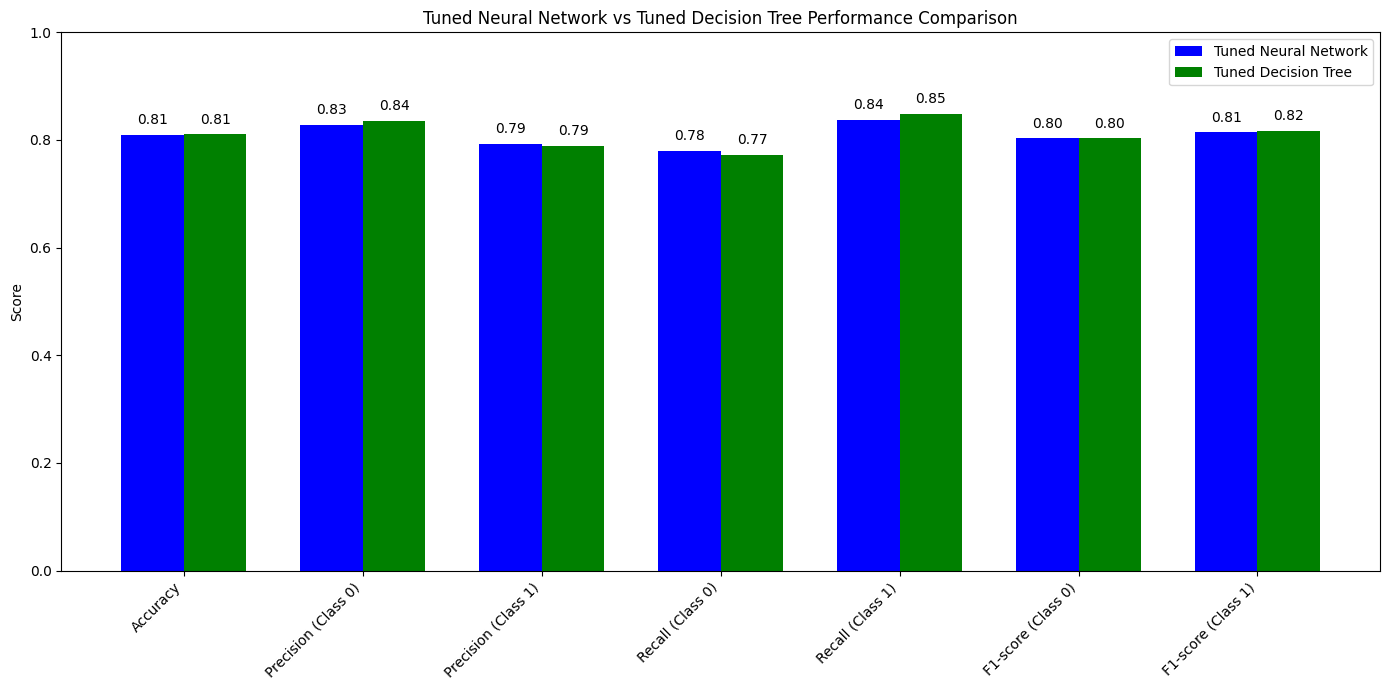

In [81]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np


#calculate metrics for tuned nn

tuned_nn_acc = accuracy_score(y_test, y_pred_best_nn)
tuned_nn_prec_0 = precision_score(y_test, y_pred_best_nn, pos_label=0)
tuned_nn_prec_1 = precision_score(y_test, y_pred_best_nn, pos_label=1)

tuned_nn_rec_0 = recall_score(y_test, y_pred_best_nn, pos_label=0)
tuned_nn_rec_1 = recall_score(y_test, y_pred_best_nn, pos_label=1)

tuned_nn_f1_0 = f1_score(y_test, y_pred_best_nn, pos_label=0)
tuned_nn_f1_1 = f1_score(y_test, y_pred_best_nn, pos_label=1)


#calculate metrics for tuned dt
tuned_dt_acc = accuracy_score(y_test, y_pred_dt_tuned)
tuned_dt_prec_0 = precision_score(y_test, y_pred_dt_tuned, pos_label=0)
tuned_dt_prec_1 = precision_score(y_test, y_pred_dt_tuned, pos_label=1)

tuned_dt_rec_0 = recall_score(y_test, y_pred_dt_tuned, pos_label=0)
tuned_dt_rec_1 = recall_score(y_test, y_pred_dt_tuned, pos_label=1)

tuned_dt_f1_0 = f1_score(y_test, y_pred_dt_tuned, pos_label=0)
tuned_dt_f1_1 = f1_score(y_test, y_pred_dt_tuned, pos_label=1)

#organize data
categories = [
    "Accuracy",
    "Precision (Class 0)", "Precision (Class 1)",
    "Recall (Class 0)", "Recall (Class 1)",
    "F1-score (Class 0)", "F1-score (Class 1)"
]

tuned_nn_scores = [
    tuned_nn_acc, tuned_nn_prec_0, tuned_nn_prec_1,
    tuned_nn_rec_0, tuned_nn_rec_1,
    tuned_nn_f1_0, tuned_nn_f1_1
]

tuned_dt_scores = [
    tuned_dt_acc, tuned_dt_prec_0, tuned_dt_prec_1,
    tuned_dt_rec_0, tuned_dt_rec_1,
    tuned_dt_f1_0, tuned_dt_f1_1
]

x = np.arange(len(categories))
width = 0.35


plt.figure(figsize=(14, 7))

# Bars
plt.bar(x - width/2, tuned_nn_scores, width, label='Tuned Neural Network', color='blue')
plt.bar(x + width/2, tuned_dt_scores, width, label='Tuned Decision Tree', color='green')

# Labels
plt.xticks(x, categories, rotation=45, ha='right')
plt.ylabel("Score")
plt.title("Tuned Neural Network vs Tuned Decision Tree Performance Comparison")
plt.ylim(0, 1)
plt.legend()

# Add values on top of bars
for i, v in enumerate(tuned_nn_scores):
    plt.text(i - width/2, v + 0.02, f"{v:.2f}", ha='center')

for i, v in enumerate(tuned_dt_scores):
    plt.text(i + width/2, v + 0.02, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()

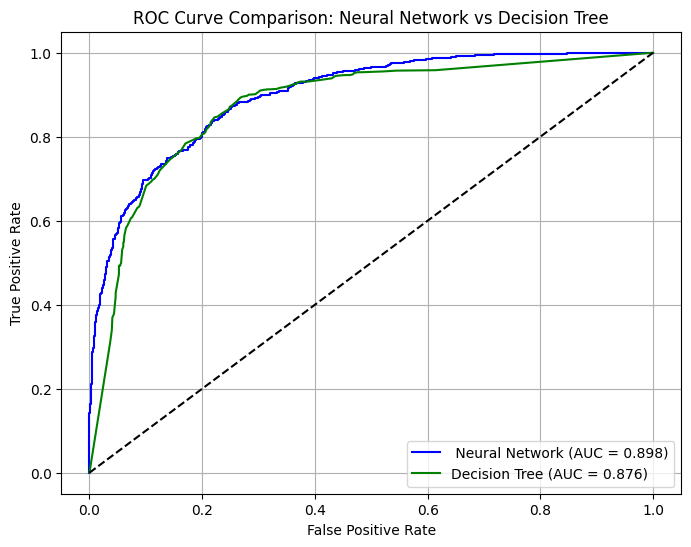

In [82]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#ROC Tuned Neural Network
y_prob_nn = best_nn.predict_proba(X_test)[:, 1]
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)
auc_nn = auc(fpr_nn, tpr_nn)

#ROC for Tuned Decision Tree
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = auc(fpr_dt, tpr_dt)

#Plot both curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, label=f" Neural Network (AUC = {auc_nn:.3f})", color='blue')
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.3f})", color='green')

# Diagonal line (baseline)
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: Neural Network vs Decision Tree")
plt.legend(loc="lower right")

plt.grid(True)
plt.show()

/tmp/ipython-input-3816795141.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


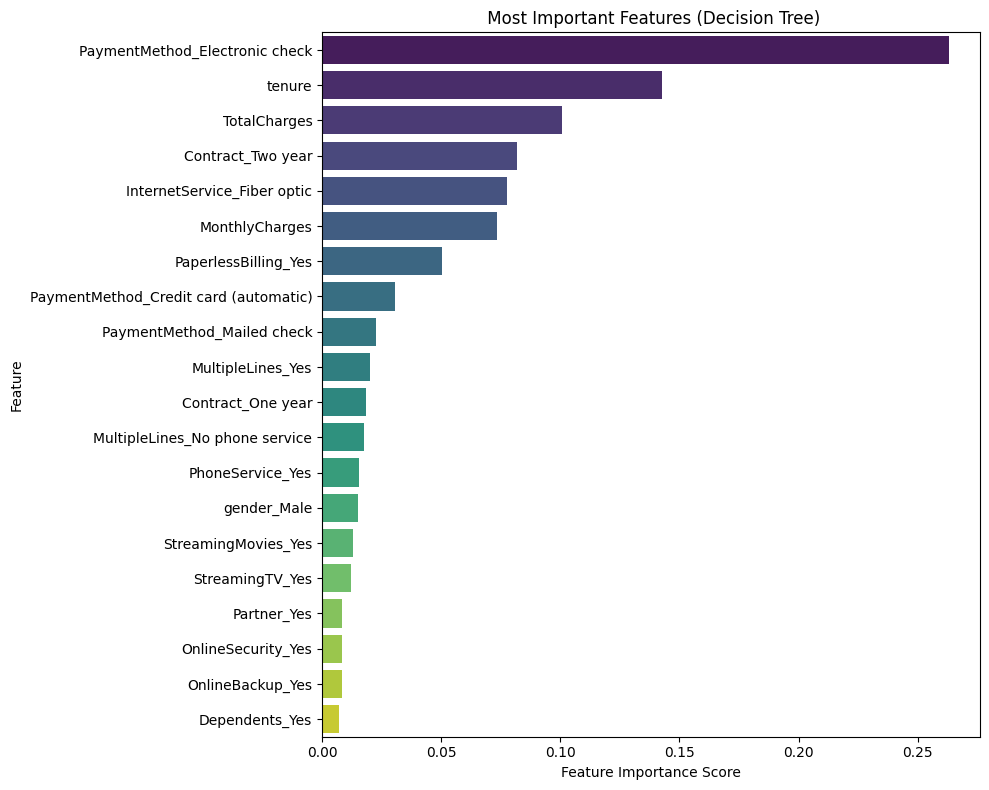

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names from X (after one-hot encoding)
feature_names = X.columns

# Extract importance values from tuned Decision Tree
importances = best_dt.feature_importances_

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(20)  # Top 20

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')

plt.title(" Most Important Features (Decision Tree)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()